# TECHNIKI PROGRAMOWANIA - projekt 3
### Oskar Belczewski 203182
### Kacper Fydrych 456789

Wykorzystane biblioteki:
- matplotplusplus (c++)

# Wizualizacja wykresów 1D
Przykład obrazujący zaimplementowaną funkcjonalnośc rysowania wykresów 1 wymiarowych
W funkcjach wystepuja argumenty:
- double start - okresla wartość odciętej, od której rozpoczyna się wykres
- double end - okresla wartość odciętej, na której kończy się wykres
- double freq - określa częstotliwość sygnału
- double low - określa wartość dolnych maximów sygnału (dla gen_sqrt i gen_saw)  
- double pick - określa wartość górnych maximów sygnału (dla gen_saw i gen_sqrt)  
- double grade / fill - określa wypełnienie sygnału (dla gen_sqrt i gen_saw)   
- double phase - określa przesunięcie fazowe (dla gen_sin i gen_cos)
- double shift_y - określa przesunięcie sygnału względem osi OY (dla gen_sin i gen_cos)
- double amplitude - określa wartość amplitudy sygnału (dla gen_sin i gen_cos)
- size_t n_samples - określa częstość próbkowania przy tworzeniu wykresu
- std::vector<double> x - przechowuje dziedzinę funkcji
Dostępne funkcje generujące sygnały:
- prep_x(start, end, n_samples) - przygotowuje dziedzinę funkcji
- gen_sin(x, freq, phase, shift_y, amplitude) generuje wykres sinusa
- gen_cos(x, freq, phase, shift_y, amplitude) generuje wykres cosinusa
- gen_sqr(x, fill, freq, low, pick) - generuje wykres sygnału prostokątnego
- gen_saw(x, freq, grade, low, pick) - generuje wykres sygnału piłokszałtnego

funkcje zwracają dynamiczne tablice vector typu double, które przechowują zbiór wartości przypisanych do argumentów funkcji.

Za wizualizację sygnału odpowiada funkcja plot(x,y), która wykorzystuje funkcje z biblioteki Matplot++

In [ ]:
import scikit_build_example as plotter

x = plotter.prep_x(-5,5,1000)
y = plotter.gen_sin(x,0.5,0.25,1,2)

plotter.plot(x, y)

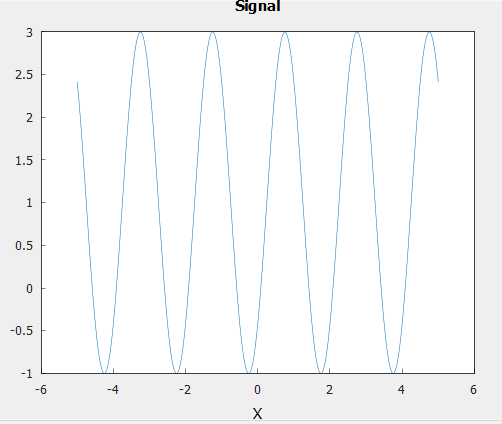

In [ ]:
x = plotter.prep_x(-5,5,1000)
y = plotter.gen_sqr(x, 0.7, 0.5, 0, 0.56)

plotter.plot(x, y)

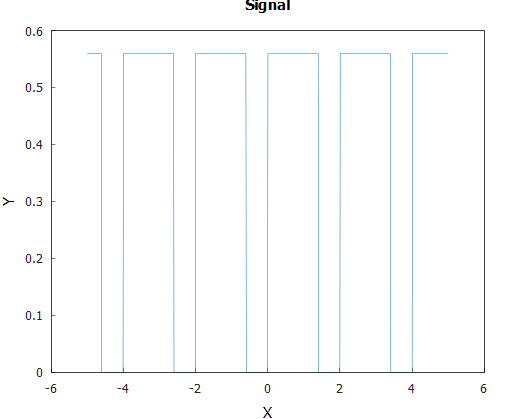

In [ ]:
x = plotter.prep_x(-5,5,1000)
y = plotter.gen_saw(x, 2, 0.4, -1, 3)

plotter.plot(x, y)

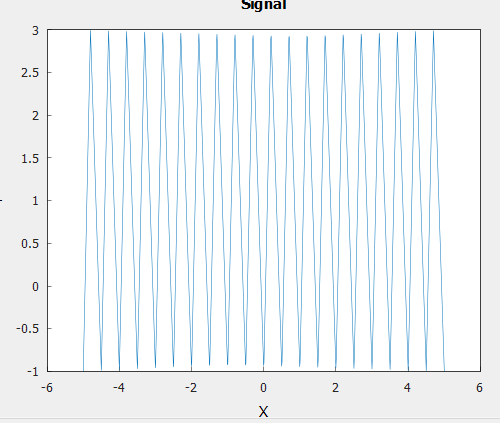

# Zaszumianie sygnału

Do zaszumiania sygnału używana jest jedna funkcja dla każdego sygnału:
std::vector<double> noise(std::vector<double>& signal, double noise_level), gdzie"
- signal - wartości funkcji opisującej sygnał
- noise level - stała określająca stosunek szumów do amplitudy sygnału 


In [ ]:
import scikit_build_example as plotter

x = plotter.prep_x(-5,5,1000)
y = plotter.gen_sqr(x, 0.7, 0.5, 0, 0.56)
noise_y = plotter.noise(y, 0.2)
plotter.plot(x, y)
plotter.plot(x, noise_y)

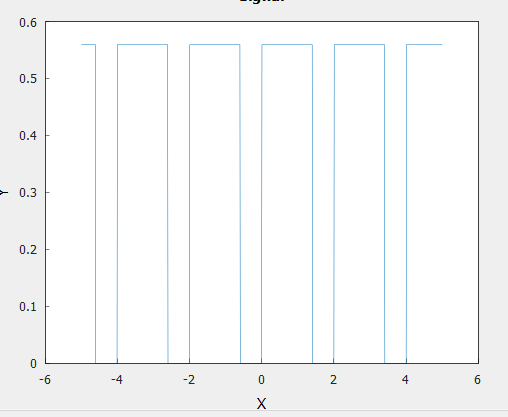 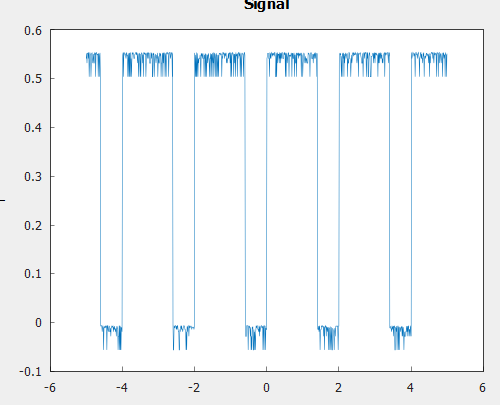

# DFT
W celu sprawdzenia poprawności implementacji DFT wykorzystamy kilka przykładowych przebiegów:
- sin(ft)
- sin(10ft)

## sin(ft)

In [ ]:
import scikit_build_example as plotter

x = plotter.prep_x(-5,5,1000)
y = plotter.gen_sin(x,1,0,0,1)
dft = plotter.DFT(y) 
plotter.plot_dft(y, 20,"Sinus")

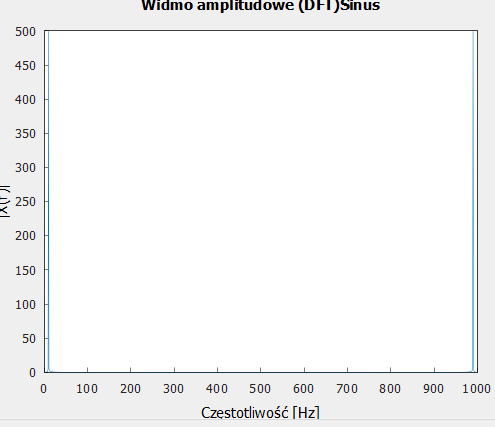 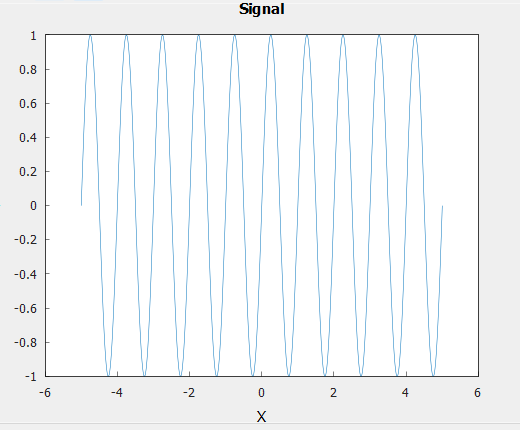

## sin(10 * ft)

In [ ]:
import scikit_build_example as plotter

x = plotter.prep_x(-5,5,1000)
y = plotter.gen_sin(x,10,0,0,1)
dft = plotter.DFT(y) 
plotter.plot_dft(y, 20,"Sinus")


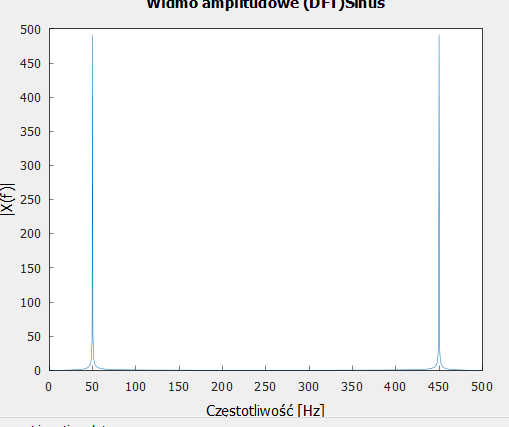 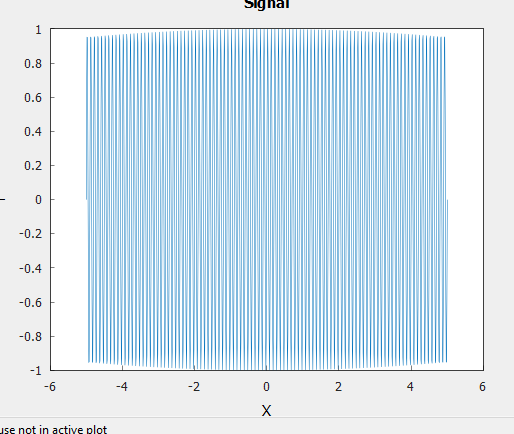

# Odwrotna transformata DFT

In [ ]:
import scikit_build_example as plotter

x = plotter.prep_x(-5,5,1000)
y = plotter.gen_sin(x,10,0,0,1)
dft = plotter.DFT(y) 
plotter.plot_dft(y, 20,"Sinus")
i = plotter.idft(dft)
plotter.plot(x,i)

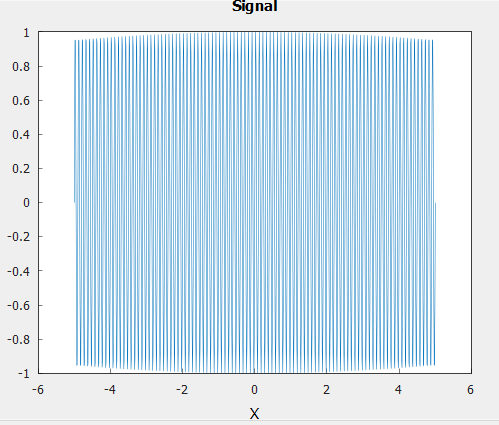 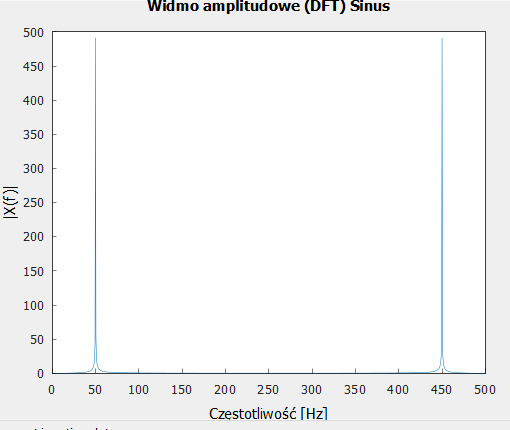

# Filtracja sygnału 1D
Do filtracji wykorzystano algorytm B-spiline. Za tfiltrację odpwiada funkcja:
std::vector<double> filter_signal(const std::vector<double>& signal, int degree)
Argumenty:
- signal - filtrowany sygnał
- degree - stopień filstrowania - najbardziej optymalne wyniki dla funkcji sinus występowały dla wartości 20 - 50, dla piłokształtnego - 5 - 10, dla prostokatnego algorytm jest nieoptymalny i zbytnio przekształca wykres w sinusoidę

In [ ]:
import scikit_build_example as plotter

x = plotter.prep_x(-5,5,1000)
y = plotter.gen_sin(x,0.5,0,0,1)
noise_y = plotter.noise(y, 0.2)
plotter.plot(x, noise_y)
filtered_y = plotter.filter_signal(noise_y, 50)
plotter.plot(x, filtered_y)


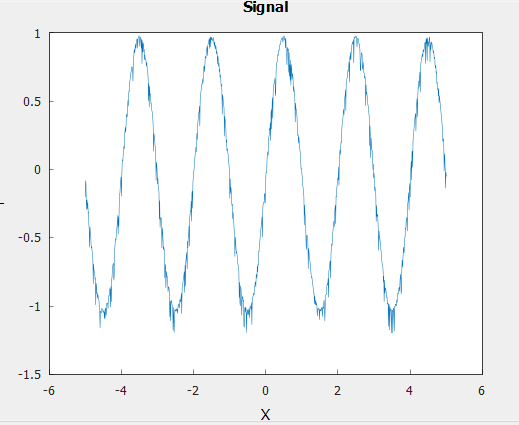 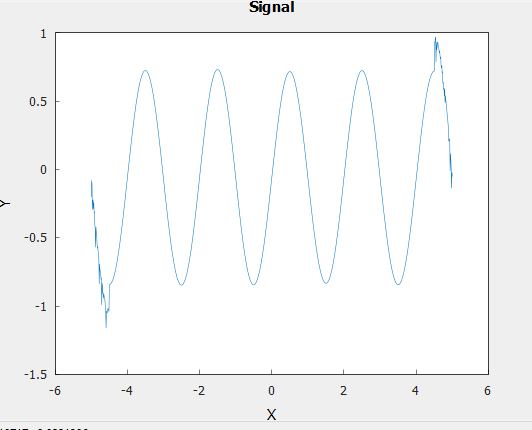

# Filtracja 2D
Filtracje obrazu przeprowadzono za pomocą uśredniania wartości r, g, b poszczególnych pixeli
Funkcja:
void filter2D(const std::string& input_filename, const std::string& output_filename, int filtrationLevel)
Argumenty:
-  input_filename - nazwa pliku, na którym przeprowadza się filtrację
- output_filename - nazwa pliku, do którego zapisywany jest przefiltrowany obraz
- filtrationLevel - poziom filtraci - przetestowano dla wartości 5, 50 oraz 100

In [ ]:
import scikit_build_example as plotter

plotter.filter2D("obr1.ppm", "obr2.ppm", 5)
plotter.filter2D("obr1.ppm", "obr2.ppm", 50)
plotter.filter2D("obr1.ppm", "obr2.ppm", 100)


# obraz początkowy
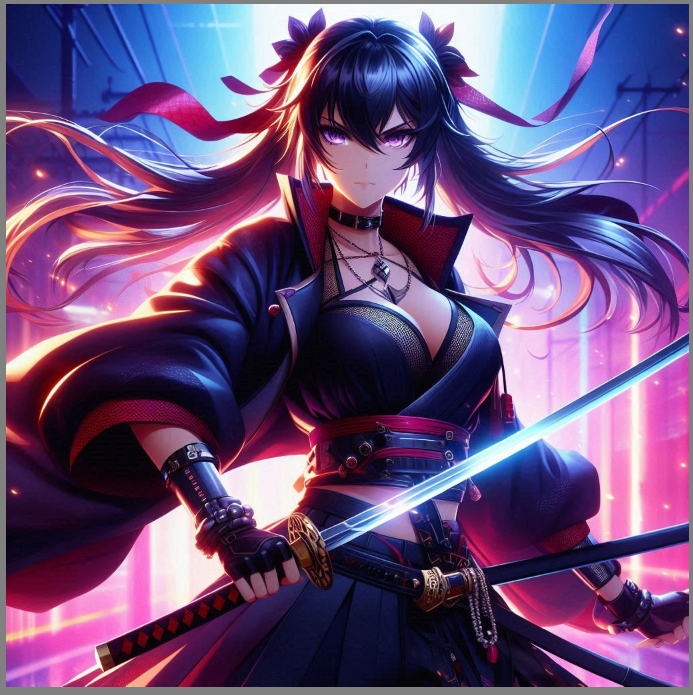 
# Wynki filtrowania
- ### filtrationLevel = 5

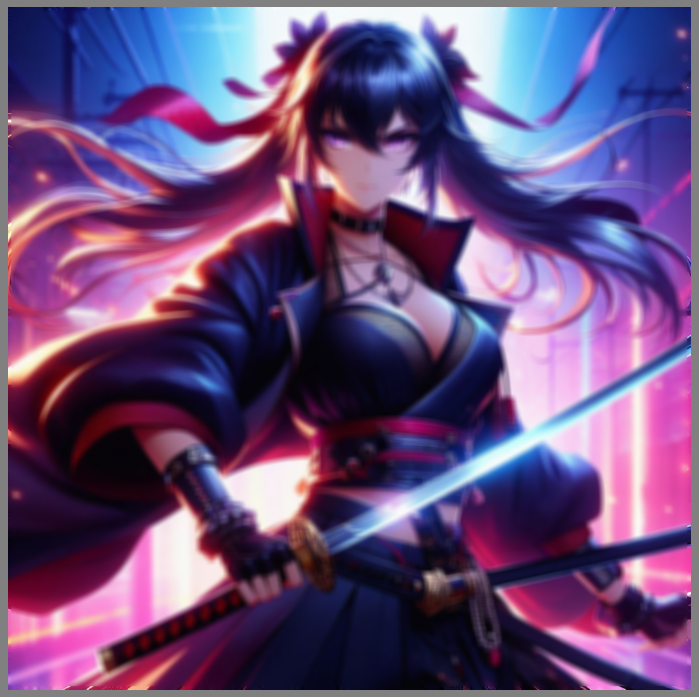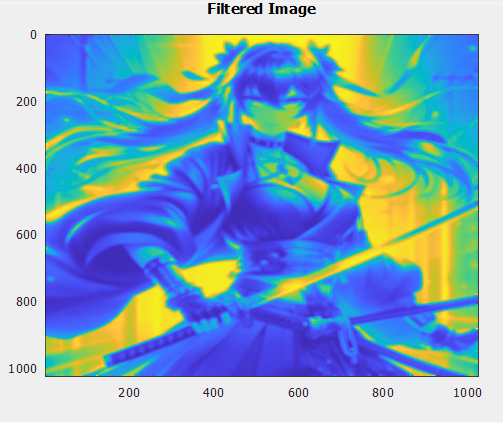
- ### filtrationLevel = 50

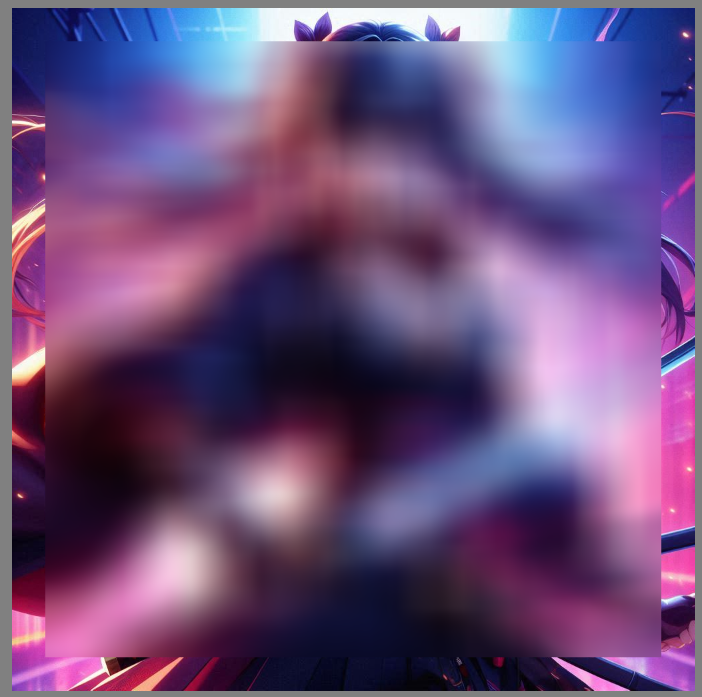 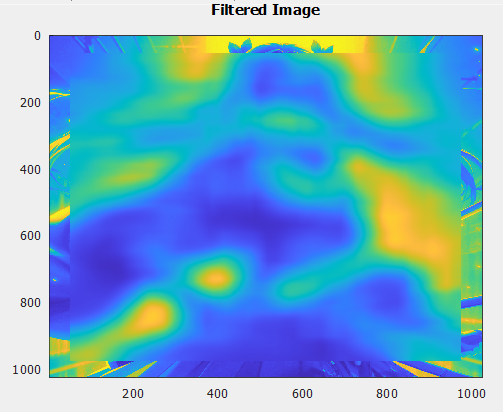
- ### filtrationLevel = 100

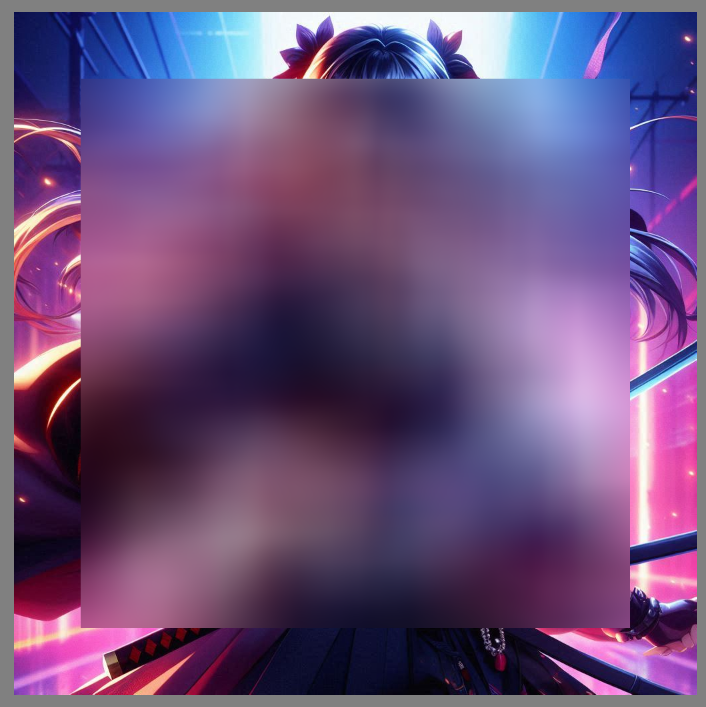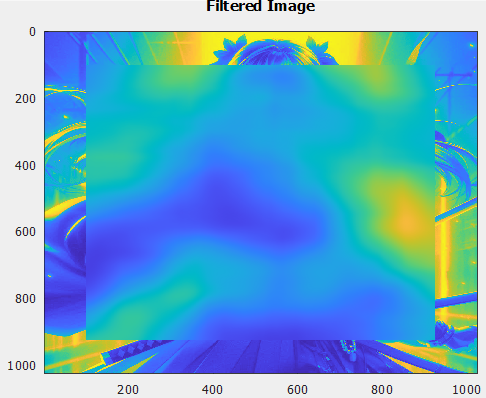